In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_json('data.json')
df

,group_id,click_count,impression_count,conversion_count,date
0,52740,0,1,0,2024-01-22
1,52758,0,1,0,2024-01-22
2,64336,2,12,0,2024-01-22
3,186281,0,1,0,2024-01-22
4,52708,0,4,0,2024-01-22
...,...,...,...,...,...
56554,161436,1,7,0,2025-02-02
56555,52909,0,8,0,2025-02-02
56556,103359,0,3,0,2025-02-02
56557,1094,37,190,3,2025-02-02


In [3]:
# Making an aggregation right away
df = df.groupby('date').agg({
    'group_id': 'nunique',  # Count unique group_ids per date (optional, if needed)
    'click_count': 'sum',   # Sum the click_count for each date
    'impression_count': 'sum',  # Sum the impression_count for each date
    'conversion_count': 'sum'   # Sum the conversion_count for each date (target column)
}).reset_index()

df

,date,group_id,click_count,impression_count,conversion_count
0,2024-01-22,64,134,2815,4
1,2024-01-23,84,1531,9990,7
2,2024-01-24,73,1695,15717,18
3,2024-01-25,87,434,7232,3
4,2024-01-26,88,290,4912,5
...,...,...,...,...,...
365,2025-01-29,212,207,4648,45
366,2025-01-30,226,505,5280,69
367,2025-01-31,222,570,5107,75
368,2025-02-01,209,263,4866,73


# Data Visualization

Text(0.5, 1.0, 'Conversion Count')

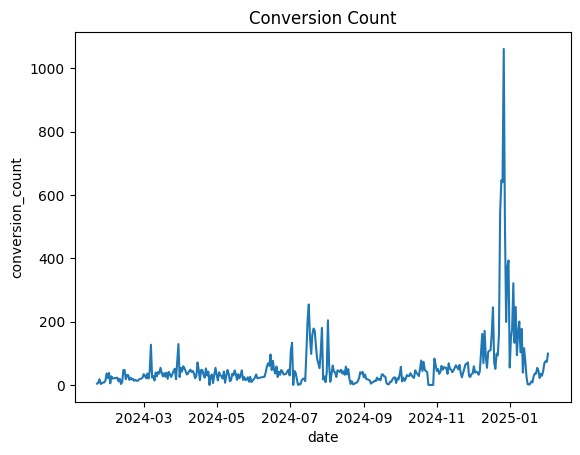

In [4]:
sns.lineplot(data = df,x = 'date',y = 'conversion_count')
plt.title('Conversion Count')

Text(0.5, 1.0, 'Click Count')

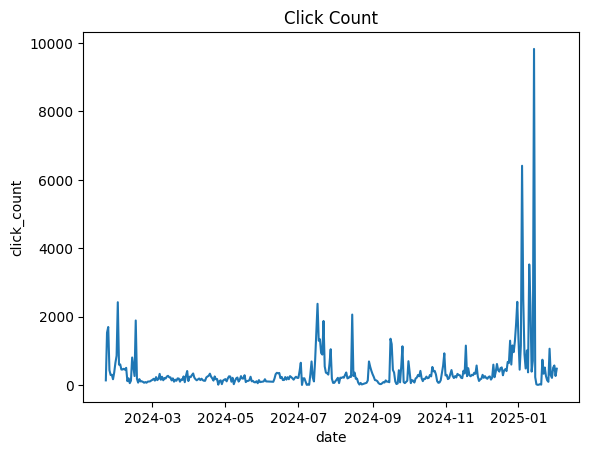

In [5]:
sns.lineplot(data = df,x = 'date',y = 'click_count')
plt.title('Click Count')

Text(0.5, 1.0, 'Impression Count')

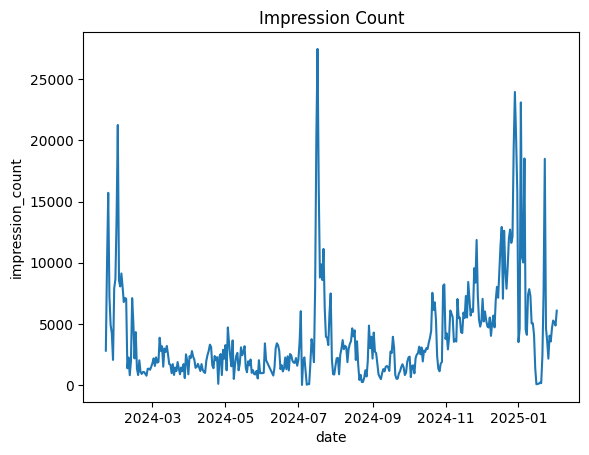

In [6]:
sns.lineplot(data = df,x = 'date',y = 'impression_count')
plt.title('Impression Count')

<Axes: >

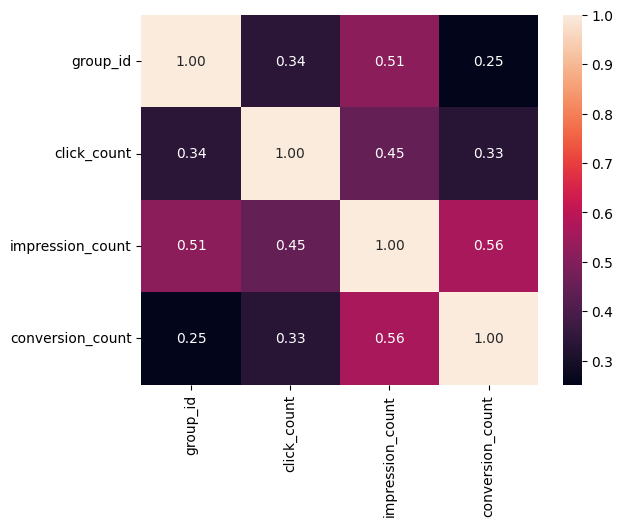

In [7]:
sns.heatmap(data = df.select_dtypes(include = ['int']).corr(),annot = True,fmt = '.2f')

# Feature Engineering

In [8]:
# Time based features
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['weekday'] = df['date'].dt.weekday
df['dayofyear'] = df['date'].dt.dayofyear
df["is_weekend"] = df["weekday"].isin([5, 6]).astype(int)

# Turkish Holidays
holidays = ["2024-01-01", "2024-04-23", "2024-05-01", "2024-07-15", "2024-10-29"]
df["is_holiday"] = df["date"].astype(str).isin(holidays).astype(int)

# Lags
lags = [3, 7, 15]
for lag in lags:
    df[f"conversion_lag_{lag}"] = df["conversion_count"].shift(lag)

df


,date,group_id,click_count,impression_count,conversion_count,year,month,weekday,dayofyear,is_weekend,is_holiday,conversion_lag_3,conversion_lag_7,conversion_lag_15
0,2024-01-22,64,134,2815,4,2024,1,0,22,0,0,NaN,NaN,NaN
1,2024-01-23,84,1531,9990,7,2024,1,1,23,0,0,NaN,NaN,NaN
2,2024-01-24,73,1695,15717,18,2024,1,2,24,0,0,NaN,NaN,NaN
3,2024-01-25,87,434,7232,3,2024,1,3,25,0,0,4.0,NaN,NaN
4,2024-01-26,88,290,4912,5,2024,1,4,26,0,0,7.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,2025-01-29,212,207,4648,45,2025,1,2,29,0,0,22.0,36.0,76.0
366,2025-01-30,226,505,5280,69,2025,1,3,30,0,0,35.0,36.0,26.0
367,2025-01-31,222,570,5107,75,2025,1,4,31,0,0,29.0,54.0,2.0
368,2025-02-01,209,263,4866,73,2025,2,5,32,1,0,45.0,45.0,1.0


In [9]:
# Since we don't have any information about previous days prior to first day we fill NaN's with 0's

df.fillna(0, inplace = True)
df

,date,group_id,click_count,impression_count,conversion_count,year,month,weekday,dayofyear,is_weekend,is_holiday,conversion_lag_3,conversion_lag_7,conversion_lag_15
0,2024-01-22,64,134,2815,4,2024,1,0,22,0,0,0.0,0.0,0.0
1,2024-01-23,84,1531,9990,7,2024,1,1,23,0,0,0.0,0.0,0.0
2,2024-01-24,73,1695,15717,18,2024,1,2,24,0,0,0.0,0.0,0.0
3,2024-01-25,87,434,7232,3,2024,1,3,25,0,0,4.0,0.0,0.0
4,2024-01-26,88,290,4912,5,2024,1,4,26,0,0,7.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,2025-01-29,212,207,4648,45,2025,1,2,29,0,0,22.0,36.0,76.0
366,2025-01-30,226,505,5280,69,2025,1,3,30,0,0,35.0,36.0,26.0
367,2025-01-31,222,570,5107,75,2025,1,4,31,0,0,29.0,54.0,2.0
368,2025-02-01,209,263,4866,73,2025,2,5,32,1,0,45.0,45.0,1.0


In [10]:
from prophet import Prophet

# Define a prophet DataFrame with proper naming
df_prophet = df.rename(columns={"date": "ds", "conversion_count": "y"})

# Turn Date into date format
df_prophet["ds"] = pd.to_datetime(df_prophet["ds"])

# Create a prophet object
model = Prophet()

model.add_regressor('click_count')
model.add_regressor('month')
model.add_regressor('impression_count')
model.add_regressor('weekday')
model.add_regressor('dayofyear')
model.add_regressor('is_weekend')
model.add_regressor('is_holiday')

model.fit(df_prophet)

13:30:15 - cmdstanpy - INFO - Chain [1] start processing
13:30:15 - cmdstanpy - INFO - Chain [1] done processing


In [11]:
# Make future dataframe 7 days long
future = model.make_future_dataframe(periods=7)

future['click_count'] = df['click_count'].iloc[-1]  
future['month'] = df['month'].iloc[-1]  
future['impression_count'] = df['impression_count'].iloc[-1] 
future['weekday'] = df['weekday'].iloc[-1]
future['dayofyear'] = df['dayofyear'].iloc[-1]
future['is_weekend'] = df['is_weekend'].iloc[-1]
future['is_holiday'] = df['is_holiday'].iloc[-1]
# Prediction
forecast = model.predict(future)

# 7 days forecasting
forecast_7_days = forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]]
forecast_7_days


,ds,yhat,yhat_lower,yhat_upper
0,2024-01-22,37.376715,-47.735358,123.643791
1,2024-01-23,40.908455,-47.861269,125.257307
2,2024-01-24,43.682237,-41.973301,131.859741
3,2024-01-25,40.885552,-42.639986,131.748607
4,2024-01-26,52.208766,-30.621597,143.247130
...,...,...,...,...
372,2025-02-05,110.877181,24.806375,198.105226
373,2025-02-06,109.262145,15.983523,202.017255
374,2025-02-07,121.767009,36.815562,215.229993
375,2025-02-08,108.808411,21.561704,201.837745


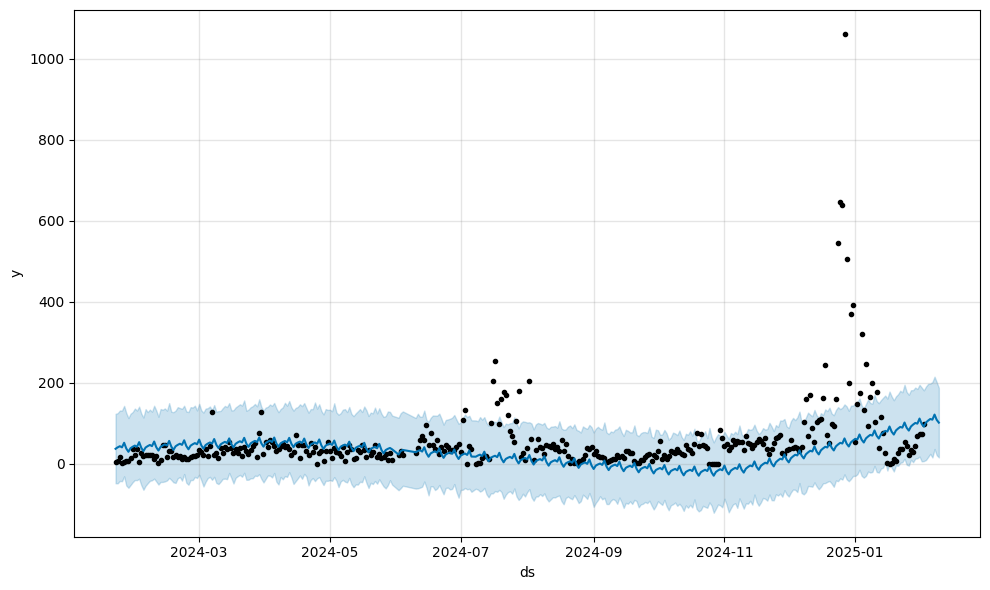

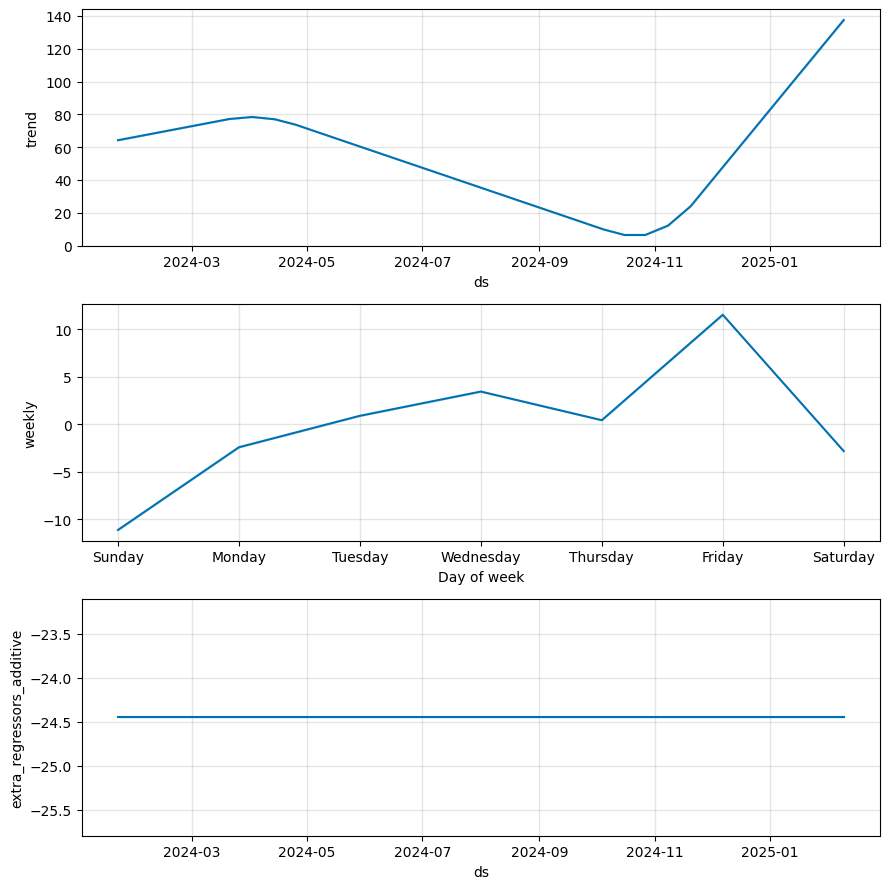

In [12]:
# Plot predictions
fig1 = model.plot(forecast)
plt.show()

# Plot components
fig2 = model.plot_components(forecast)
plt.show()

In [33]:
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error
train = df_prophet
test = df_prophet.tail(7)  # For example, we can use the last 7 data points for testing

# The actual values for the last 7 days in the test set
actual_values = test['y']

# The predicted values from the Prophet model (forecasted)
predicted_values = forecast['yhat'].tail(7)

# 1. MAE (Mean Absolute Error)
mae = mean_absolute_error(actual_values, predicted_values)
print(f"MAE: {mae}")

# 2. RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(actual_values, predicted_values))
print(f"RMSE: {rmse}")

# 3. MAPE (Mean Absolute Percentage Error)
mape = mean_absolute_percentage_error(actual_values,predicted_values)
print(f"MAPE: {mape}")

MAE: 48.106494327685375
RMSE: 53.48887041347386
MAPE: 1.1140039644405313


# Hyperparameter Optimization

In [22]:
from prophet.diagnostics import cross_validation, performance_metrics
from sklearn.model_selection import ParameterGrid

# Define a grid of hyperparameters to search
param_grid = {
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [10, 50, 100, 500],
    'holidays_prior_scale': [0.01, 0.1, 1],
    'seasonality_mode': ['additive', 'multiplicative'],
    'growth': ['linear', 'logistic']
}

# Perform cross-validation on different hyperparameters
best_score = float('inf')
best_params = {}

grid = ParameterGrid(param_grid)
cnt = 0
for p in grid:
    cnt = cnt+1

print('Total Possible Models',cnt)

Total Possible Models 192


In [36]:
from prophet.diagnostics import cross_validation, performance_metrics
from sklearn.model_selection import ParameterGrid

# Define a grid of hyperparameters to search
param_grid = {
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [10, 50, 100, 500],
    'holidays_prior_scale': [0.01, 0.1, 1],
    'seasonality_mode': ['additive', 'multiplicative'],
    'growth': ['linear', 'logistic']  # logistic requires a 'cap' column
}

# Initialize the cross-validation result
best_score = float('inf')
best_params = {}

grid = ParameterGrid(param_grid)
cnt = 0

for p in grid:
    cnt += 1
    print(f"Model {cnt} with parameters: {p}")
    
    # Initialize and train the model with the hyperparameters
    model = Prophet(
        changepoint_prior_scale=p['changepoint_prior_scale'],
        seasonality_prior_scale=p['seasonality_prior_scale'],
        holidays_prior_scale=p['holidays_prior_scale'],
        seasonality_mode=p['seasonality_mode'],
        growth=p['growth']
    )
    model.add_regressor('click_count')
    model.add_regressor('month')
    model.add_regressor('impression_count')
    model.add_regressor('weekday')
    model.add_regressor('dayofyear')
    model.add_regressor('is_weekend')
    model.add_regressor('is_holiday')
    
    # If using logistic growth, add a 'cap' column
    if p['growth'] == 'logistic':
        df_prophet['cap'] = df_prophet['y'].max() * 1.1  # 10% above the max value of y

    # Fit the model
    model.fit(df_prophet)
    
    # Perform cross-validation
    df_cv = cross_validation(model, initial='365 days', period='180 days', horizon='7 days')
    
    # Get the performance metrics
    df_p = performance_metrics(df_cv)
    
    # Assume that we use RMSE as our score for optimization
    rmse_score = df_p['rmse'].mean()
    
    # Keep track of the best parameters based on RMSE
    if rmse_score < best_score:
        best_score = rmse_score
        best_params = p
    
    print(f"RMSE: {rmse_score} for parameters: {p}")
    
print(f"Best Hyperparameters: {best_params} with RMSE: {best_score}")


Model 1 with parameters: {'changepoint_prior_scale': 0.001, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10}


13:48:31 - cmdstanpy - INFO - Chain [1] start processing
13:48:31 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:48:31 - cmdstanpy - INFO - Chain [1] start processing
13:48:32 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.99it/s]


RMSE: 20.380941991447422 for parameters: {'changepoint_prior_scale': 0.001, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10}
Model 2 with parameters: {'changepoint_prior_scale': 0.001, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 50}


13:48:32 - cmdstanpy - INFO - Chain [1] start processing
13:48:32 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:48:32 - cmdstanpy - INFO - Chain [1] start processing
13:48:33 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.08it/s]


RMSE: 20.380687141978132 for parameters: {'changepoint_prior_scale': 0.001, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 50}
Model 3 with parameters: {'changepoint_prior_scale': 0.001, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 100}


13:48:33 - cmdstanpy - INFO - Chain [1] start processing
13:48:33 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:48:33 - cmdstanpy - INFO - Chain [1] start processing
13:48:33 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.12it/s]


RMSE: 20.40697578790821 for parameters: {'changepoint_prior_scale': 0.001, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 100}
Model 4 with parameters: {'changepoint_prior_scale': 0.001, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 500}


13:48:34 - cmdstanpy - INFO - Chain [1] start processing
13:48:34 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:48:34 - cmdstanpy - INFO - Chain [1] start processing
13:48:34 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.07it/s]


RMSE: 20.37959645811937 for parameters: {'changepoint_prior_scale': 0.001, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 500}
Model 5 with parameters: {'changepoint_prior_scale': 0.001, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10}


13:48:35 - cmdstanpy - INFO - Chain [1] start processing
13:48:35 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:48:35 - cmdstanpy - INFO - Chain [1] start processing
13:48:35 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.14it/s]


RMSE: 50.630065547202655 for parameters: {'changepoint_prior_scale': 0.001, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10}
Model 6 with parameters: {'changepoint_prior_scale': 0.001, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 50}


13:48:36 - cmdstanpy - INFO - Chain [1] start processing
13:48:36 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:48:36 - cmdstanpy - INFO - Chain [1] start processing
13:48:36 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.18it/s]


RMSE: 50.62995948127728 for parameters: {'changepoint_prior_scale': 0.001, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 50}
Model 7 with parameters: {'changepoint_prior_scale': 0.001, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 100}


13:48:37 - cmdstanpy - INFO - Chain [1] start processing
13:48:37 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:48:37 - cmdstanpy - INFO - Chain [1] start processing
13:48:37 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.26it/s]


RMSE: 50.62995248599858 for parameters: {'changepoint_prior_scale': 0.001, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 100}
Model 8 with parameters: {'changepoint_prior_scale': 0.001, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 500}


13:48:38 - cmdstanpy - INFO - Chain [1] start processing
13:48:38 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:48:38 - cmdstanpy - INFO - Chain [1] start processing
13:48:38 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.14it/s]


RMSE: 50.62995167152855 for parameters: {'changepoint_prior_scale': 0.001, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 500}
Model 9 with parameters: {'changepoint_prior_scale': 0.001, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10}


13:48:39 - cmdstanpy - INFO - Chain [1] start processing
13:48:39 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:48:39 - cmdstanpy - INFO - Chain [1] start processing
13:48:39 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.22it/s]


RMSE: 32.74181771363909 for parameters: {'changepoint_prior_scale': 0.001, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10}
Model 10 with parameters: {'changepoint_prior_scale': 0.001, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 50}


13:48:40 - cmdstanpy - INFO - Chain [1] start processing
13:48:40 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:48:40 - cmdstanpy - INFO - Chain [1] start processing
13:48:40 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.11it/s]


RMSE: 32.74137512349819 for parameters: {'changepoint_prior_scale': 0.001, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 50}
Model 11 with parameters: {'changepoint_prior_scale': 0.001, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 100}


13:48:40 - cmdstanpy - INFO - Chain [1] start processing
13:48:41 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:48:41 - cmdstanpy - INFO - Chain [1] start processing
13:48:41 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.14it/s]


RMSE: 32.74180042786164 for parameters: {'changepoint_prior_scale': 0.001, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 100}
Model 12 with parameters: {'changepoint_prior_scale': 0.001, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 500}


13:48:41 - cmdstanpy - INFO - Chain [1] start processing
13:48:41 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:48:42 - cmdstanpy - INFO - Chain [1] start processing
13:48:42 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.22it/s]


RMSE: 32.74179074691431 for parameters: {'changepoint_prior_scale': 0.001, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 500}
Model 13 with parameters: {'changepoint_prior_scale': 0.001, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10}


13:48:42 - cmdstanpy - INFO - Chain [1] start processing
13:48:42 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:48:43 - cmdstanpy - INFO - Chain [1] start processing
13:48:43 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.15it/s]


RMSE: 25.90601355443434 for parameters: {'changepoint_prior_scale': 0.001, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10}
Model 14 with parameters: {'changepoint_prior_scale': 0.001, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 50}


13:48:43 - cmdstanpy - INFO - Chain [1] start processing
13:48:43 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:48:44 - cmdstanpy - INFO - Chain [1] start processing
13:48:44 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.11it/s]


RMSE: 25.905999309704697 for parameters: {'changepoint_prior_scale': 0.001, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 50}
Model 15 with parameters: {'changepoint_prior_scale': 0.001, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 100}


13:48:44 - cmdstanpy - INFO - Chain [1] start processing
13:48:44 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:48:45 - cmdstanpy - INFO - Chain [1] start processing
13:48:45 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.15it/s]


RMSE: 25.90602305603263 for parameters: {'changepoint_prior_scale': 0.001, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 100}
Model 16 with parameters: {'changepoint_prior_scale': 0.001, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 500}


13:48:45 - cmdstanpy - INFO - Chain [1] start processing
13:48:45 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:48:46 - cmdstanpy - INFO - Chain [1] start processing
13:48:46 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.14it/s]


RMSE: 25.906004843790406 for parameters: {'changepoint_prior_scale': 0.001, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 500}
Model 17 with parameters: {'changepoint_prior_scale': 0.001, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10}


13:48:46 - cmdstanpy - INFO - Chain [1] start processing
13:48:46 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:48:47 - cmdstanpy - INFO - Chain [1] start processing
13:48:47 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.08it/s]


RMSE: 33.346370163573816 for parameters: {'changepoint_prior_scale': 0.001, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10}
Model 18 with parameters: {'changepoint_prior_scale': 0.001, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 50}


13:48:47 - cmdstanpy - INFO - Chain [1] start processing
13:48:47 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:48:48 - cmdstanpy - INFO - Chain [1] start processing
13:48:48 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.10it/s]


RMSE: 33.35404532431833 for parameters: {'changepoint_prior_scale': 0.001, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 50}
Model 19 with parameters: {'changepoint_prior_scale': 0.001, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 100}


13:48:48 - cmdstanpy - INFO - Chain [1] start processing
13:48:48 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:48:48 - cmdstanpy - INFO - Chain [1] start processing
13:48:49 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.13it/s]


RMSE: 33.31411625116788 for parameters: {'changepoint_prior_scale': 0.001, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 100}
Model 20 with parameters: {'changepoint_prior_scale': 0.001, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 500}


13:48:49 - cmdstanpy - INFO - Chain [1] start processing
13:48:49 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:48:49 - cmdstanpy - INFO - Chain [1] start processing
13:48:49 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.16it/s]


RMSE: 33.314970532308266 for parameters: {'changepoint_prior_scale': 0.001, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 500}
Model 21 with parameters: {'changepoint_prior_scale': 0.001, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10}


13:48:50 - cmdstanpy - INFO - Chain [1] start processing
13:48:50 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:48:50 - cmdstanpy - INFO - Chain [1] start processing
13:48:50 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.19it/s]


RMSE: 26.684569088621295 for parameters: {'changepoint_prior_scale': 0.001, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10}
Model 22 with parameters: {'changepoint_prior_scale': 0.001, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 50}


13:48:51 - cmdstanpy - INFO - Chain [1] start processing
13:48:51 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:48:51 - cmdstanpy - INFO - Chain [1] start processing
13:48:51 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.23it/s]


RMSE: 26.68486352349006 for parameters: {'changepoint_prior_scale': 0.001, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 50}
Model 23 with parameters: {'changepoint_prior_scale': 0.001, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 100}


13:48:52 - cmdstanpy - INFO - Chain [1] start processing
13:48:52 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:48:52 - cmdstanpy - INFO - Chain [1] start processing
13:48:52 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.07it/s]


RMSE: 26.68470755569141 for parameters: {'changepoint_prior_scale': 0.001, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 100}
Model 24 with parameters: {'changepoint_prior_scale': 0.001, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 500}


13:48:53 - cmdstanpy - INFO - Chain [1] start processing
13:48:53 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:48:53 - cmdstanpy - INFO - Chain [1] start processing
13:48:53 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.13it/s]


RMSE: 26.68482293442827 for parameters: {'changepoint_prior_scale': 0.001, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 500}
Model 25 with parameters: {'changepoint_prior_scale': 0.001, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10}


13:48:54 - cmdstanpy - INFO - Chain [1] start processing
13:48:54 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:48:54 - cmdstanpy - INFO - Chain [1] start processing
13:48:54 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.76it/s]


RMSE: 34.421647709326514 for parameters: {'changepoint_prior_scale': 0.001, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10}
Model 26 with parameters: {'changepoint_prior_scale': 0.001, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 50}


13:48:55 - cmdstanpy - INFO - Chain [1] start processing
13:48:55 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:48:55 - cmdstanpy - INFO - Chain [1] start processing
13:48:55 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.71it/s]


RMSE: 34.4210486654208 for parameters: {'changepoint_prior_scale': 0.001, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 50}
Model 27 with parameters: {'changepoint_prior_scale': 0.001, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 100}


13:48:56 - cmdstanpy - INFO - Chain [1] start processing
13:48:56 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:48:56 - cmdstanpy - INFO - Chain [1] start processing
13:48:56 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.69it/s]


RMSE: 34.42244308407157 for parameters: {'changepoint_prior_scale': 0.001, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 100}
Model 28 with parameters: {'changepoint_prior_scale': 0.001, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 500}


13:48:57 - cmdstanpy - INFO - Chain [1] start processing
13:48:57 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:48:57 - cmdstanpy - INFO - Chain [1] start processing
13:48:57 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.64it/s]


RMSE: 34.42129608791729 for parameters: {'changepoint_prior_scale': 0.001, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 500}
Model 29 with parameters: {'changepoint_prior_scale': 0.001, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10}


13:48:58 - cmdstanpy - INFO - Chain [1] start processing
13:48:58 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:48:58 - cmdstanpy - INFO - Chain [1] start processing
13:48:58 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.55it/s]


RMSE: 37.18744890515996 for parameters: {'changepoint_prior_scale': 0.001, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10}
Model 30 with parameters: {'changepoint_prior_scale': 0.001, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 50}


13:48:59 - cmdstanpy - INFO - Chain [1] start processing
13:48:59 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:48:59 - cmdstanpy - INFO - Chain [1] start processing
13:48:59 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.68it/s]


RMSE: 37.18744890512299 for parameters: {'changepoint_prior_scale': 0.001, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 50}
Model 31 with parameters: {'changepoint_prior_scale': 0.001, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 100}


13:49:00 - cmdstanpy - INFO - Chain [1] start processing
13:49:00 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:49:00 - cmdstanpy - INFO - Chain [1] start processing
13:49:00 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.90it/s]


RMSE: 37.18744890512171 for parameters: {'changepoint_prior_scale': 0.001, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 100}
Model 32 with parameters: {'changepoint_prior_scale': 0.001, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 500}


13:49:01 - cmdstanpy - INFO - Chain [1] start processing
13:49:01 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:49:01 - cmdstanpy - INFO - Chain [1] start processing
13:49:02 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.71it/s]


RMSE: 37.18744890512195 for parameters: {'changepoint_prior_scale': 0.001, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 500}
Model 33 with parameters: {'changepoint_prior_scale': 0.001, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10}


13:49:02 - cmdstanpy - INFO - Chain [1] start processing
13:49:02 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:49:03 - cmdstanpy - INFO - Chain [1] start processing
13:49:03 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.58it/s]


RMSE: 30.66235055650222 for parameters: {'changepoint_prior_scale': 0.001, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10}
Model 34 with parameters: {'changepoint_prior_scale': 0.001, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 50}


13:49:03 - cmdstanpy - INFO - Chain [1] start processing
13:49:03 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:49:04 - cmdstanpy - INFO - Chain [1] start processing
13:49:04 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.74it/s]


RMSE: 30.3399683534936 for parameters: {'changepoint_prior_scale': 0.001, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 50}
Model 35 with parameters: {'changepoint_prior_scale': 0.001, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 100}


13:49:04 - cmdstanpy - INFO - Chain [1] start processing
13:49:04 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:49:05 - cmdstanpy - INFO - Chain [1] start processing
13:49:05 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.76it/s]


RMSE: 30.780627588500245 for parameters: {'changepoint_prior_scale': 0.001, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 100}
Model 36 with parameters: {'changepoint_prior_scale': 0.001, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 500}


13:49:05 - cmdstanpy - INFO - Chain [1] start processing
13:49:05 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:49:06 - cmdstanpy - INFO - Chain [1] start processing
13:49:06 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.78it/s]


RMSE: 31.155172087682406 for parameters: {'changepoint_prior_scale': 0.001, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 500}
Model 37 with parameters: {'changepoint_prior_scale': 0.001, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10}


13:49:06 - cmdstanpy - INFO - Chain [1] start processing
13:49:06 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:49:07 - cmdstanpy - INFO - Chain [1] start processing
13:49:07 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.73it/s]


RMSE: 37.18891519358424 for parameters: {'changepoint_prior_scale': 0.001, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10}
Model 38 with parameters: {'changepoint_prior_scale': 0.001, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 50}


13:49:07 - cmdstanpy - INFO - Chain [1] start processing
13:49:08 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:49:08 - cmdstanpy - INFO - Chain [1] start processing
13:49:08 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.64it/s]


RMSE: 37.188915191412015 for parameters: {'changepoint_prior_scale': 0.001, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 50}
Model 39 with parameters: {'changepoint_prior_scale': 0.001, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 100}


13:49:09 - cmdstanpy - INFO - Chain [1] start processing
13:49:09 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:49:09 - cmdstanpy - INFO - Chain [1] start processing
13:49:09 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.75it/s]


RMSE: 37.18891519135576 for parameters: {'changepoint_prior_scale': 0.001, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 100}
Model 40 with parameters: {'changepoint_prior_scale': 0.001, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 500}


13:49:10 - cmdstanpy - INFO - Chain [1] start processing
13:49:10 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:49:10 - cmdstanpy - INFO - Chain [1] start processing
13:49:10 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.74it/s]


RMSE: 37.18891519133951 for parameters: {'changepoint_prior_scale': 0.001, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 500}
Model 41 with parameters: {'changepoint_prior_scale': 0.001, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10}


13:49:11 - cmdstanpy - INFO - Chain [1] start processing
13:49:11 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:49:11 - cmdstanpy - INFO - Chain [1] start processing
13:49:11 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.75it/s]


RMSE: 24.5123676106383 for parameters: {'changepoint_prior_scale': 0.001, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10}
Model 42 with parameters: {'changepoint_prior_scale': 0.001, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 50}


13:49:12 - cmdstanpy - INFO - Chain [1] start processing
13:49:12 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:49:12 - cmdstanpy - INFO - Chain [1] start processing
13:49:12 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.64it/s]


RMSE: 25.079439349711258 for parameters: {'changepoint_prior_scale': 0.001, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 50}
Model 43 with parameters: {'changepoint_prior_scale': 0.001, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 100}


13:49:13 - cmdstanpy - INFO - Chain [1] start processing
13:49:13 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:49:13 - cmdstanpy - INFO - Chain [1] start processing
13:49:13 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.72it/s]


RMSE: 24.84317201714122 for parameters: {'changepoint_prior_scale': 0.001, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 100}
Model 44 with parameters: {'changepoint_prior_scale': 0.001, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 500}


13:49:14 - cmdstanpy - INFO - Chain [1] start processing
13:49:14 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:49:14 - cmdstanpy - INFO - Chain [1] start processing
13:49:14 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.55it/s]


RMSE: 25.046271466280054 for parameters: {'changepoint_prior_scale': 0.001, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 500}
Model 45 with parameters: {'changepoint_prior_scale': 0.001, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10}


13:49:15 - cmdstanpy - INFO - Chain [1] start processing
13:49:15 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:49:15 - cmdstanpy - INFO - Chain [1] start processing
13:49:15 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.58it/s]


RMSE: 37.18892563506524 for parameters: {'changepoint_prior_scale': 0.001, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10}
Model 46 with parameters: {'changepoint_prior_scale': 0.001, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 50}


13:49:16 - cmdstanpy - INFO - Chain [1] start processing
13:49:16 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:49:16 - cmdstanpy - INFO - Chain [1] start processing
13:49:17 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.75it/s]


RMSE: 37.18892563506493 for parameters: {'changepoint_prior_scale': 0.001, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 50}
Model 47 with parameters: {'changepoint_prior_scale': 0.001, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 100}


13:49:17 - cmdstanpy - INFO - Chain [1] start processing
13:49:17 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:49:18 - cmdstanpy - INFO - Chain [1] start processing
13:49:18 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.74it/s]


RMSE: 37.18892563506519 for parameters: {'changepoint_prior_scale': 0.001, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 100}
Model 48 with parameters: {'changepoint_prior_scale': 0.001, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 500}


13:49:18 - cmdstanpy - INFO - Chain [1] start processing
13:49:18 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:49:19 - cmdstanpy - INFO - Chain [1] start processing
13:49:19 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.71it/s]


RMSE: 37.18892563506506 for parameters: {'changepoint_prior_scale': 0.001, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 500}
Model 49 with parameters: {'changepoint_prior_scale': 0.01, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10}


13:49:19 - cmdstanpy - INFO - Chain [1] start processing
13:49:19 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:49:20 - cmdstanpy - INFO - Chain [1] start processing
13:49:20 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.09it/s]


RMSE: 15.07639276777488 for parameters: {'changepoint_prior_scale': 0.01, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10}
Model 50 with parameters: {'changepoint_prior_scale': 0.01, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 50}


13:49:20 - cmdstanpy - INFO - Chain [1] start processing
13:49:20 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:49:21 - cmdstanpy - INFO - Chain [1] start processing
13:49:21 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.04it/s]


RMSE: 15.075403652828816 for parameters: {'changepoint_prior_scale': 0.01, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 50}
Model 51 with parameters: {'changepoint_prior_scale': 0.01, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 100}


13:49:21 - cmdstanpy - INFO - Chain [1] start processing
13:49:21 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:49:21 - cmdstanpy - INFO - Chain [1] start processing
13:49:22 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.31it/s]


RMSE: 15.075490970491725 for parameters: {'changepoint_prior_scale': 0.01, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 100}
Model 52 with parameters: {'changepoint_prior_scale': 0.01, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 500}


13:49:22 - cmdstanpy - INFO - Chain [1] start processing
13:49:22 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:49:22 - cmdstanpy - INFO - Chain [1] start processing
13:49:22 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.15it/s]


RMSE: 15.076183622646216 for parameters: {'changepoint_prior_scale': 0.01, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 500}
Model 53 with parameters: {'changepoint_prior_scale': 0.01, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10}


13:49:23 - cmdstanpy - INFO - Chain [1] start processing
13:49:23 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:49:23 - cmdstanpy - INFO - Chain [1] start processing
13:49:23 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.15it/s]


RMSE: 43.76940541142776 for parameters: {'changepoint_prior_scale': 0.01, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10}
Model 54 with parameters: {'changepoint_prior_scale': 0.01, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 50}


13:49:24 - cmdstanpy - INFO - Chain [1] start processing
13:49:24 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:49:24 - cmdstanpy - INFO - Chain [1] start processing
13:49:24 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.01it/s]


RMSE: 43.54607673649145 for parameters: {'changepoint_prior_scale': 0.01, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 50}
Model 55 with parameters: {'changepoint_prior_scale': 0.01, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 100}


13:49:25 - cmdstanpy - INFO - Chain [1] start processing
13:49:25 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:49:25 - cmdstanpy - INFO - Chain [1] start processing
13:49:25 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.33it/s]


RMSE: 43.85398085503728 for parameters: {'changepoint_prior_scale': 0.01, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 100}
Model 56 with parameters: {'changepoint_prior_scale': 0.01, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 500}


13:49:26 - cmdstanpy - INFO - Chain [1] start processing
13:49:26 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:49:26 - cmdstanpy - INFO - Chain [1] start processing
13:49:26 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.02it/s]


RMSE: 43.233785513033475 for parameters: {'changepoint_prior_scale': 0.01, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 500}
Model 57 with parameters: {'changepoint_prior_scale': 0.01, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10}


13:49:27 - cmdstanpy - INFO - Chain [1] start processing
13:49:27 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:49:27 - cmdstanpy - INFO - Chain [1] start processing
13:49:27 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.17it/s]


RMSE: 13.969904374948817 for parameters: {'changepoint_prior_scale': 0.01, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10}
Model 58 with parameters: {'changepoint_prior_scale': 0.01, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 50}


13:49:28 - cmdstanpy - INFO - Chain [1] start processing
13:49:28 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:49:28 - cmdstanpy - INFO - Chain [1] start processing
13:49:28 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.13it/s]


RMSE: 13.960439261730738 for parameters: {'changepoint_prior_scale': 0.01, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 50}
Model 59 with parameters: {'changepoint_prior_scale': 0.01, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 100}


13:49:29 - cmdstanpy - INFO - Chain [1] start processing
13:49:29 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:49:29 - cmdstanpy - INFO - Chain [1] start processing
13:49:29 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.00it/s]


RMSE: 13.969102649397561 for parameters: {'changepoint_prior_scale': 0.01, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 100}
Model 60 with parameters: {'changepoint_prior_scale': 0.01, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 500}


13:49:30 - cmdstanpy - INFO - Chain [1] start processing
13:49:30 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:49:30 - cmdstanpy - INFO - Chain [1] start processing
13:49:30 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.11it/s]


RMSE: 13.96292234456489 for parameters: {'changepoint_prior_scale': 0.01, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 500}
Model 61 with parameters: {'changepoint_prior_scale': 0.01, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10}


13:49:31 - cmdstanpy - INFO - Chain [1] start processing
13:49:31 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:49:31 - cmdstanpy - INFO - Chain [1] start processing
13:49:31 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.99it/s]


RMSE: 32.18948938886707 for parameters: {'changepoint_prior_scale': 0.01, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10}
Model 62 with parameters: {'changepoint_prior_scale': 0.01, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 50}


13:49:32 - cmdstanpy - INFO - Chain [1] start processing
13:49:32 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:49:32 - cmdstanpy - INFO - Chain [1] start processing
13:49:32 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.98it/s]


RMSE: 32.5154868055871 for parameters: {'changepoint_prior_scale': 0.01, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 50}
Model 63 with parameters: {'changepoint_prior_scale': 0.01, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 100}


13:49:33 - cmdstanpy - INFO - Chain [1] start processing
13:49:33 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:49:33 - cmdstanpy - INFO - Chain [1] start processing
13:49:33 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.91it/s]


RMSE: 32.07053696857346 for parameters: {'changepoint_prior_scale': 0.01, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 100}
Model 64 with parameters: {'changepoint_prior_scale': 0.01, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 500}


13:49:34 - cmdstanpy - INFO - Chain [1] start processing
13:49:34 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:49:34 - cmdstanpy - INFO - Chain [1] start processing
13:49:34 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.96it/s]


RMSE: 34.17718015143141 for parameters: {'changepoint_prior_scale': 0.01, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 500}
Model 65 with parameters: {'changepoint_prior_scale': 0.01, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10}


13:49:35 - cmdstanpy - INFO - Chain [1] start processing
13:49:35 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:49:35 - cmdstanpy - INFO - Chain [1] start processing
13:49:35 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.10it/s]


RMSE: 13.915536389469484 for parameters: {'changepoint_prior_scale': 0.01, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10}
Model 66 with parameters: {'changepoint_prior_scale': 0.01, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 50}


13:49:36 - cmdstanpy - INFO - Chain [1] start processing
13:49:36 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:49:36 - cmdstanpy - INFO - Chain [1] start processing
13:49:36 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.02it/s]


RMSE: 14.010840903760684 for parameters: {'changepoint_prior_scale': 0.01, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 50}
Model 67 with parameters: {'changepoint_prior_scale': 0.01, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 100}


13:49:37 - cmdstanpy - INFO - Chain [1] start processing
13:49:37 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:49:37 - cmdstanpy - INFO - Chain [1] start processing
13:49:37 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.37it/s]


RMSE: 14.01135249830125 for parameters: {'changepoint_prior_scale': 0.01, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 100}
Model 68 with parameters: {'changepoint_prior_scale': 0.01, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 500}


13:49:38 - cmdstanpy - INFO - Chain [1] start processing
13:49:38 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:49:38 - cmdstanpy - INFO - Chain [1] start processing
13:49:38 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.34it/s]


RMSE: 14.011542552104853 for parameters: {'changepoint_prior_scale': 0.01, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 500}
Model 69 with parameters: {'changepoint_prior_scale': 0.01, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10}


13:49:38 - cmdstanpy - INFO - Chain [1] start processing
13:49:38 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:49:39 - cmdstanpy - INFO - Chain [1] start processing
13:49:39 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.05it/s]


RMSE: 17.905662277436843 for parameters: {'changepoint_prior_scale': 0.01, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10}
Model 70 with parameters: {'changepoint_prior_scale': 0.01, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 50}


13:49:39 - cmdstanpy - INFO - Chain [1] start processing
13:49:39 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:49:40 - cmdstanpy - INFO - Chain [1] start processing
13:49:40 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.05it/s]


RMSE: 17.928241861559453 for parameters: {'changepoint_prior_scale': 0.01, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 50}
Model 71 with parameters: {'changepoint_prior_scale': 0.01, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 100}


13:49:40 - cmdstanpy - INFO - Chain [1] start processing
13:49:40 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:49:41 - cmdstanpy - INFO - Chain [1] start processing
13:49:41 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.31it/s]


RMSE: 17.94402847281323 for parameters: {'changepoint_prior_scale': 0.01, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 100}
Model 72 with parameters: {'changepoint_prior_scale': 0.01, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 500}


13:49:41 - cmdstanpy - INFO - Chain [1] start processing
13:49:41 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:49:42 - cmdstanpy - INFO - Chain [1] start processing
13:49:42 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.21it/s]


RMSE: 17.72372921877771 for parameters: {'changepoint_prior_scale': 0.01, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 500}
Model 73 with parameters: {'changepoint_prior_scale': 0.01, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10}


13:49:42 - cmdstanpy - INFO - Chain [1] start processing
13:49:42 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:49:43 - cmdstanpy - INFO - Chain [1] start processing
13:49:43 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.75it/s]


RMSE: 15.91609331749309 for parameters: {'changepoint_prior_scale': 0.01, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10}
Model 74 with parameters: {'changepoint_prior_scale': 0.01, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 50}


13:49:43 - cmdstanpy - INFO - Chain [1] start processing
13:49:43 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:49:44 - cmdstanpy - INFO - Chain [1] start processing
13:49:44 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.75it/s]


RMSE: 15.916940181378779 for parameters: {'changepoint_prior_scale': 0.01, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 50}
Model 75 with parameters: {'changepoint_prior_scale': 0.01, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 100}


13:49:44 - cmdstanpy - INFO - Chain [1] start processing
13:49:44 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:49:45 - cmdstanpy - INFO - Chain [1] start processing
13:49:45 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.62it/s]


RMSE: 15.916934260218337 for parameters: {'changepoint_prior_scale': 0.01, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 100}
Model 76 with parameters: {'changepoint_prior_scale': 0.01, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 500}


13:49:45 - cmdstanpy - INFO - Chain [1] start processing
13:49:45 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:49:46 - cmdstanpy - INFO - Chain [1] start processing
13:49:46 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.63it/s]


RMSE: 15.91672872909095 for parameters: {'changepoint_prior_scale': 0.01, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 500}
Model 77 with parameters: {'changepoint_prior_scale': 0.01, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10}


13:49:47 - cmdstanpy - INFO - Chain [1] start processing
13:49:47 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:49:47 - cmdstanpy - INFO - Chain [1] start processing
13:49:47 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.70it/s]


RMSE: 19.90529992290783 for parameters: {'changepoint_prior_scale': 0.01, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10}
Model 78 with parameters: {'changepoint_prior_scale': 0.01, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 50}


13:49:48 - cmdstanpy - INFO - Chain [1] start processing
13:49:48 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:49:48 - cmdstanpy - INFO - Chain [1] start processing
13:49:48 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.79it/s]


RMSE: 19.905307115858875 for parameters: {'changepoint_prior_scale': 0.01, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 50}
Model 79 with parameters: {'changepoint_prior_scale': 0.01, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 100}


13:49:49 - cmdstanpy - INFO - Chain [1] start processing
13:49:49 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:49:49 - cmdstanpy - INFO - Chain [1] start processing
13:49:49 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.52it/s]


RMSE: 19.905300141005455 for parameters: {'changepoint_prior_scale': 0.01, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 100}
Model 80 with parameters: {'changepoint_prior_scale': 0.01, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 500}


13:49:50 - cmdstanpy - INFO - Chain [1] start processing
13:49:50 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:49:50 - cmdstanpy - INFO - Chain [1] start processing
13:49:50 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.71it/s]


RMSE: 19.905299222721816 for parameters: {'changepoint_prior_scale': 0.01, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 500}
Model 81 with parameters: {'changepoint_prior_scale': 0.01, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10}


13:49:51 - cmdstanpy - INFO - Chain [1] start processing
13:49:51 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:49:51 - cmdstanpy - INFO - Chain [1] start processing
13:49:51 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.73it/s]


RMSE: 14.438913486495064 for parameters: {'changepoint_prior_scale': 0.01, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10}
Model 82 with parameters: {'changepoint_prior_scale': 0.01, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 50}


13:49:52 - cmdstanpy - INFO - Chain [1] start processing
13:49:52 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:49:52 - cmdstanpy - INFO - Chain [1] start processing
13:49:52 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.60it/s]


RMSE: 14.436228981407949 for parameters: {'changepoint_prior_scale': 0.01, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 50}
Model 83 with parameters: {'changepoint_prior_scale': 0.01, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 100}


13:49:53 - cmdstanpy - INFO - Chain [1] start processing
13:49:53 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:49:54 - cmdstanpy - INFO - Chain [1] start processing
13:49:54 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.78it/s]


RMSE: 14.436382434710067 for parameters: {'changepoint_prior_scale': 0.01, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 100}
Model 84 with parameters: {'changepoint_prior_scale': 0.01, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 500}


13:49:54 - cmdstanpy - INFO - Chain [1] start processing
13:49:54 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:49:55 - cmdstanpy - INFO - Chain [1] start processing
13:49:55 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.69it/s]


RMSE: 14.437293641709905 for parameters: {'changepoint_prior_scale': 0.01, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 500}
Model 85 with parameters: {'changepoint_prior_scale': 0.01, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10}


13:49:55 - cmdstanpy - INFO - Chain [1] start processing
13:49:55 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:49:56 - cmdstanpy - INFO - Chain [1] start processing
13:49:56 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.67it/s]


RMSE: 18.795498444410537 for parameters: {'changepoint_prior_scale': 0.01, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10}
Model 86 with parameters: {'changepoint_prior_scale': 0.01, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 50}


13:49:56 - cmdstanpy - INFO - Chain [1] start processing
13:49:56 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:49:57 - cmdstanpy - INFO - Chain [1] start processing
13:49:57 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.75it/s]


RMSE: 18.79098282135421 for parameters: {'changepoint_prior_scale': 0.01, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 50}
Model 87 with parameters: {'changepoint_prior_scale': 0.01, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 100}


13:49:57 - cmdstanpy - INFO - Chain [1] start processing
13:49:57 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:49:58 - cmdstanpy - INFO - Chain [1] start processing
13:49:58 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.74it/s]


RMSE: 18.791009904887414 for parameters: {'changepoint_prior_scale': 0.01, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 100}
Model 88 with parameters: {'changepoint_prior_scale': 0.01, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 500}


13:49:58 - cmdstanpy - INFO - Chain [1] start processing
13:49:59 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:49:59 - cmdstanpy - INFO - Chain [1] start processing
13:49:59 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.71it/s]


RMSE: 18.791815685812065 for parameters: {'changepoint_prior_scale': 0.01, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 500}
Model 89 with parameters: {'changepoint_prior_scale': 0.01, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10}


13:50:00 - cmdstanpy - INFO - Chain [1] start processing
13:50:00 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:50:00 - cmdstanpy - INFO - Chain [1] start processing
13:50:00 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.72it/s]


RMSE: 14.366072943814212 for parameters: {'changepoint_prior_scale': 0.01, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10}
Model 90 with parameters: {'changepoint_prior_scale': 0.01, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 50}


13:50:01 - cmdstanpy - INFO - Chain [1] start processing
13:50:01 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:50:01 - cmdstanpy - INFO - Chain [1] start processing
13:50:01 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.73it/s]


RMSE: 14.366094686868129 for parameters: {'changepoint_prior_scale': 0.01, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 50}
Model 91 with parameters: {'changepoint_prior_scale': 0.01, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 100}


13:50:02 - cmdstanpy - INFO - Chain [1] start processing
13:50:02 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:50:02 - cmdstanpy - INFO - Chain [1] start processing
13:50:02 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.67it/s]


RMSE: 14.366094845146142 for parameters: {'changepoint_prior_scale': 0.01, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 100}
Model 92 with parameters: {'changepoint_prior_scale': 0.01, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 500}


13:50:03 - cmdstanpy - INFO - Chain [1] start processing
13:50:03 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:50:03 - cmdstanpy - INFO - Chain [1] start processing
13:50:03 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.74it/s]


RMSE: 14.36607500227021 for parameters: {'changepoint_prior_scale': 0.01, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 500}
Model 93 with parameters: {'changepoint_prior_scale': 0.01, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10}


13:50:04 - cmdstanpy - INFO - Chain [1] start processing
13:50:04 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:50:04 - cmdstanpy - INFO - Chain [1] start processing
13:50:04 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.63it/s]


RMSE: 19.598467849573577 for parameters: {'changepoint_prior_scale': 0.01, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10}
Model 94 with parameters: {'changepoint_prior_scale': 0.01, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 50}


13:50:05 - cmdstanpy - INFO - Chain [1] start processing
13:50:05 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:50:05 - cmdstanpy - INFO - Chain [1] start processing
13:50:05 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.71it/s]


RMSE: 20.418201283519302 for parameters: {'changepoint_prior_scale': 0.01, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 50}
Model 95 with parameters: {'changepoint_prior_scale': 0.01, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 100}


13:50:06 - cmdstanpy - INFO - Chain [1] start processing
13:50:06 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:50:06 - cmdstanpy - INFO - Chain [1] start processing
13:50:06 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.67it/s]


RMSE: 20.414050731404277 for parameters: {'changepoint_prior_scale': 0.01, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 100}
Model 96 with parameters: {'changepoint_prior_scale': 0.01, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 500}


13:50:07 - cmdstanpy - INFO - Chain [1] start processing
13:50:07 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:50:07 - cmdstanpy - INFO - Chain [1] start processing
13:50:08 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.66it/s]


RMSE: 20.41245791802016 for parameters: {'changepoint_prior_scale': 0.01, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 500}
Model 97 with parameters: {'changepoint_prior_scale': 0.1, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10}


13:50:08 - cmdstanpy - INFO - Chain [1] start processing
13:50:08 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:50:09 - cmdstanpy - INFO - Chain [1] start processing
13:50:09 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.01it/s]


RMSE: 56.58884590874491 for parameters: {'changepoint_prior_scale': 0.1, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10}
Model 98 with parameters: {'changepoint_prior_scale': 0.1, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 50}


13:50:09 - cmdstanpy - INFO - Chain [1] start processing
13:50:09 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:50:10 - cmdstanpy - INFO - Chain [1] start processing
13:50:10 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.65it/s]


RMSE: 59.73303737529072 for parameters: {'changepoint_prior_scale': 0.1, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 50}
Model 99 with parameters: {'changepoint_prior_scale': 0.1, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 100}


13:50:10 - cmdstanpy - INFO - Chain [1] start processing
13:50:10 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:50:11 - cmdstanpy - INFO - Chain [1] start processing
13:50:11 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.00it/s]


RMSE: 56.6871055245267 for parameters: {'changepoint_prior_scale': 0.1, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 100}
Model 100 with parameters: {'changepoint_prior_scale': 0.1, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 500}


13:50:11 - cmdstanpy - INFO - Chain [1] start processing
13:50:11 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:50:12 - cmdstanpy - INFO - Chain [1] start processing
13:50:12 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.83it/s]


RMSE: 60.220134321828745 for parameters: {'changepoint_prior_scale': 0.1, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 500}
Model 101 with parameters: {'changepoint_prior_scale': 0.1, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10}


13:50:12 - cmdstanpy - INFO - Chain [1] start processing
13:50:13 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:50:13 - cmdstanpy - INFO - Chain [1] start processing
13:50:13 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.02it/s]


RMSE: 115.87470692844931 for parameters: {'changepoint_prior_scale': 0.1, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10}
Model 102 with parameters: {'changepoint_prior_scale': 0.1, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 50}


13:50:13 - cmdstanpy - INFO - Chain [1] start processing
13:50:14 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:50:14 - cmdstanpy - INFO - Chain [1] start processing
13:50:14 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.06it/s]


RMSE: 116.01308731261108 for parameters: {'changepoint_prior_scale': 0.1, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 50}
Model 103 with parameters: {'changepoint_prior_scale': 0.1, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 100}


13:50:14 - cmdstanpy - INFO - Chain [1] start processing
13:50:14 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:50:15 - cmdstanpy - INFO - Chain [1] start processing
13:50:15 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.11it/s]


RMSE: 116.29602514997396 for parameters: {'changepoint_prior_scale': 0.1, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 100}
Model 104 with parameters: {'changepoint_prior_scale': 0.1, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 500}


13:50:15 - cmdstanpy - INFO - Chain [1] start processing
13:50:15 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:50:16 - cmdstanpy - INFO - Chain [1] start processing
13:50:16 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.04it/s]


RMSE: 116.0571370299504 for parameters: {'changepoint_prior_scale': 0.1, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 500}
Model 105 with parameters: {'changepoint_prior_scale': 0.1, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10}


13:50:16 - cmdstanpy - INFO - Chain [1] start processing
13:50:16 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:50:17 - cmdstanpy - INFO - Chain [1] start processing
13:50:17 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.98it/s]


RMSE: 55.58485873438726 for parameters: {'changepoint_prior_scale': 0.1, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10}
Model 106 with parameters: {'changepoint_prior_scale': 0.1, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 50}


13:50:17 - cmdstanpy - INFO - Chain [1] start processing
13:50:17 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:50:18 - cmdstanpy - INFO - Chain [1] start processing
13:50:18 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.85it/s]


RMSE: 55.21693190824899 for parameters: {'changepoint_prior_scale': 0.1, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 50}
Model 107 with parameters: {'changepoint_prior_scale': 0.1, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 100}


13:50:18 - cmdstanpy - INFO - Chain [1] start processing
13:50:19 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:50:19 - cmdstanpy - INFO - Chain [1] start processing
13:50:19 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.94it/s]


RMSE: 54.70252538311798 for parameters: {'changepoint_prior_scale': 0.1, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 100}
Model 108 with parameters: {'changepoint_prior_scale': 0.1, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 500}


13:50:19 - cmdstanpy - INFO - Chain [1] start processing
13:50:20 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:50:20 - cmdstanpy - INFO - Chain [1] start processing
13:50:20 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.89it/s]


RMSE: 56.9223321209658 for parameters: {'changepoint_prior_scale': 0.1, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 500}
Model 109 with parameters: {'changepoint_prior_scale': 0.1, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10}


13:50:20 - cmdstanpy - INFO - Chain [1] start processing
13:50:21 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:50:21 - cmdstanpy - INFO - Chain [1] start processing
13:50:21 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.90it/s]


RMSE: 47.283000742591575 for parameters: {'changepoint_prior_scale': 0.1, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10}
Model 110 with parameters: {'changepoint_prior_scale': 0.1, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 50}


13:50:22 - cmdstanpy - INFO - Chain [1] start processing
13:50:22 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:50:22 - cmdstanpy - INFO - Chain [1] start processing
13:50:22 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.90it/s]


RMSE: 47.59854780939071 for parameters: {'changepoint_prior_scale': 0.1, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 50}
Model 111 with parameters: {'changepoint_prior_scale': 0.1, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 100}


13:50:23 - cmdstanpy - INFO - Chain [1] start processing
13:50:23 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:50:23 - cmdstanpy - INFO - Chain [1] start processing
13:50:23 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.62it/s]


RMSE: 47.60347003040052 for parameters: {'changepoint_prior_scale': 0.1, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 100}
Model 112 with parameters: {'changepoint_prior_scale': 0.1, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 500}


13:50:24 - cmdstanpy - INFO - Chain [1] start processing
13:50:24 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:50:24 - cmdstanpy - INFO - Chain [1] start processing
13:50:24 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.73it/s]


RMSE: 48.21976948658643 for parameters: {'changepoint_prior_scale': 0.1, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 500}
Model 113 with parameters: {'changepoint_prior_scale': 0.1, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10}


13:50:25 - cmdstanpy - INFO - Chain [1] start processing
13:50:25 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:50:25 - cmdstanpy - INFO - Chain [1] start processing
13:50:25 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.98it/s]


RMSE: 56.88107140356764 for parameters: {'changepoint_prior_scale': 0.1, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10}
Model 114 with parameters: {'changepoint_prior_scale': 0.1, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 50}


13:50:26 - cmdstanpy - INFO - Chain [1] start processing
13:50:26 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:50:26 - cmdstanpy - INFO - Chain [1] start processing
13:50:26 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.99it/s]


RMSE: 57.11263130136748 for parameters: {'changepoint_prior_scale': 0.1, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 50}
Model 115 with parameters: {'changepoint_prior_scale': 0.1, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 100}


13:50:27 - cmdstanpy - INFO - Chain [1] start processing
13:50:27 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:50:27 - cmdstanpy - INFO - Chain [1] start processing
13:50:28 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.92it/s]


RMSE: 55.3597179983841 for parameters: {'changepoint_prior_scale': 0.1, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 100}
Model 116 with parameters: {'changepoint_prior_scale': 0.1, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 500}


13:50:28 - cmdstanpy - INFO - Chain [1] start processing
13:50:28 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:50:28 - cmdstanpy - INFO - Chain [1] start processing
13:50:29 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.90it/s]


RMSE: 56.16147475128845 for parameters: {'changepoint_prior_scale': 0.1, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 500}
Model 117 with parameters: {'changepoint_prior_scale': 0.1, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10}


13:50:29 - cmdstanpy - INFO - Chain [1] start processing
13:50:29 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:50:30 - cmdstanpy - INFO - Chain [1] start processing
13:50:30 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.66it/s]


RMSE: 35.53420925422136 for parameters: {'changepoint_prior_scale': 0.1, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10}
Model 118 with parameters: {'changepoint_prior_scale': 0.1, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 50}


13:50:30 - cmdstanpy - INFO - Chain [1] start processing
13:50:30 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:50:31 - cmdstanpy - INFO - Chain [1] start processing
13:50:31 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.76it/s]


RMSE: 37.52938361210398 for parameters: {'changepoint_prior_scale': 0.1, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 50}
Model 119 with parameters: {'changepoint_prior_scale': 0.1, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 100}


13:50:31 - cmdstanpy - INFO - Chain [1] start processing
13:50:32 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:50:32 - cmdstanpy - INFO - Chain [1] start processing
13:50:32 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.78it/s]


RMSE: 36.54652516619876 for parameters: {'changepoint_prior_scale': 0.1, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 100}
Model 120 with parameters: {'changepoint_prior_scale': 0.1, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 500}


13:50:32 - cmdstanpy - INFO - Chain [1] start processing
13:50:33 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:50:33 - cmdstanpy - INFO - Chain [1] start processing
13:50:33 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.79it/s]


RMSE: 37.190465639151924 for parameters: {'changepoint_prior_scale': 0.1, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 500}
Model 121 with parameters: {'changepoint_prior_scale': 0.1, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10}


13:50:34 - cmdstanpy - INFO - Chain [1] start processing
13:50:34 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:50:34 - cmdstanpy - INFO - Chain [1] start processing
13:50:34 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.55it/s]


RMSE: 14.66028410688492 for parameters: {'changepoint_prior_scale': 0.1, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10}
Model 122 with parameters: {'changepoint_prior_scale': 0.1, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 50}


13:50:35 - cmdstanpy - INFO - Chain [1] start processing
13:50:35 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:50:35 - cmdstanpy - INFO - Chain [1] start processing
13:50:35 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.68it/s]


RMSE: 14.65781909834782 for parameters: {'changepoint_prior_scale': 0.1, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 50}
Model 123 with parameters: {'changepoint_prior_scale': 0.1, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 100}


13:50:36 - cmdstanpy - INFO - Chain [1] start processing
13:50:36 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:50:37 - cmdstanpy - INFO - Chain [1] start processing
13:50:37 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.69it/s]


RMSE: 14.657863793207197 for parameters: {'changepoint_prior_scale': 0.1, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 100}
Model 124 with parameters: {'changepoint_prior_scale': 0.1, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 500}


13:50:37 - cmdstanpy - INFO - Chain [1] start processing
13:50:37 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:50:38 - cmdstanpy - INFO - Chain [1] start processing
13:50:38 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.82it/s]


RMSE: 14.657917836602394 for parameters: {'changepoint_prior_scale': 0.1, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 500}
Model 125 with parameters: {'changepoint_prior_scale': 0.1, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10}


13:50:38 - cmdstanpy - INFO - Chain [1] start processing
13:50:38 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:50:39 - cmdstanpy - INFO - Chain [1] start processing
13:50:39 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.62it/s]


RMSE: 52.66298780965095 for parameters: {'changepoint_prior_scale': 0.1, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10}
Model 126 with parameters: {'changepoint_prior_scale': 0.1, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 50}


13:50:39 - cmdstanpy - INFO - Chain [1] start processing
13:50:39 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:50:40 - cmdstanpy - INFO - Chain [1] start processing
13:50:40 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.63it/s]


RMSE: 54.01816926543783 for parameters: {'changepoint_prior_scale': 0.1, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 50}
Model 127 with parameters: {'changepoint_prior_scale': 0.1, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 100}


13:50:40 - cmdstanpy - INFO - Chain [1] start processing
13:50:40 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:50:41 - cmdstanpy - INFO - Chain [1] start processing
13:50:41 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.43it/s]


RMSE: 52.6762370911544 for parameters: {'changepoint_prior_scale': 0.1, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 100}
Model 128 with parameters: {'changepoint_prior_scale': 0.1, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 500}


13:50:42 - cmdstanpy - INFO - Chain [1] start processing
13:50:42 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:50:42 - cmdstanpy - INFO - Chain [1] start processing
13:50:42 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.54it/s]


RMSE: 54.061180979462065 for parameters: {'changepoint_prior_scale': 0.1, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 500}
Model 129 with parameters: {'changepoint_prior_scale': 0.1, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10}


13:50:43 - cmdstanpy - INFO - Chain [1] start processing
13:50:43 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:50:43 - cmdstanpy - INFO - Chain [1] start processing
13:50:43 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.54it/s]


RMSE: 16.79328215545824 for parameters: {'changepoint_prior_scale': 0.1, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10}
Model 130 with parameters: {'changepoint_prior_scale': 0.1, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 50}


13:50:44 - cmdstanpy - INFO - Chain [1] start processing
13:50:44 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:50:44 - cmdstanpy - INFO - Chain [1] start processing
13:50:44 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.62it/s]


RMSE: 16.6688200870196 for parameters: {'changepoint_prior_scale': 0.1, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 50}
Model 131 with parameters: {'changepoint_prior_scale': 0.1, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 100}


13:50:45 - cmdstanpy - INFO - Chain [1] start processing
13:50:45 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:50:45 - cmdstanpy - INFO - Chain [1] start processing
13:50:45 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.69it/s]


RMSE: 16.73578584616783 for parameters: {'changepoint_prior_scale': 0.1, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 100}
Model 132 with parameters: {'changepoint_prior_scale': 0.1, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 500}


13:50:46 - cmdstanpy - INFO - Chain [1] start processing
13:50:46 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:50:46 - cmdstanpy - INFO - Chain [1] start processing
13:50:47 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.67it/s]


RMSE: 17.158055372805357 for parameters: {'changepoint_prior_scale': 0.1, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 500}
Model 133 with parameters: {'changepoint_prior_scale': 0.1, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10}


13:50:47 - cmdstanpy - INFO - Chain [1] start processing
13:50:47 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:50:48 - cmdstanpy - INFO - Chain [1] start processing
13:50:48 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.58it/s]


RMSE: 29.00653084697601 for parameters: {'changepoint_prior_scale': 0.1, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10}
Model 134 with parameters: {'changepoint_prior_scale': 0.1, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 50}


13:50:48 - cmdstanpy - INFO - Chain [1] start processing
13:50:48 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:50:49 - cmdstanpy - INFO - Chain [1] start processing
13:50:49 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.72it/s]


RMSE: 29.1774624175315 for parameters: {'changepoint_prior_scale': 0.1, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 50}
Model 135 with parameters: {'changepoint_prior_scale': 0.1, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 100}


13:50:49 - cmdstanpy - INFO - Chain [1] start processing
13:50:49 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:50:50 - cmdstanpy - INFO - Chain [1] start processing
13:50:50 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.61it/s]


RMSE: 29.228404589126374 for parameters: {'changepoint_prior_scale': 0.1, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 100}
Model 136 with parameters: {'changepoint_prior_scale': 0.1, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 500}


13:50:50 - cmdstanpy - INFO - Chain [1] start processing
13:50:50 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:50:51 - cmdstanpy - INFO - Chain [1] start processing
13:50:51 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.66it/s]


RMSE: 29.1735476122035 for parameters: {'changepoint_prior_scale': 0.1, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 500}
Model 137 with parameters: {'changepoint_prior_scale': 0.1, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10}


13:50:51 - cmdstanpy - INFO - Chain [1] start processing
13:50:52 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:50:52 - cmdstanpy - INFO - Chain [1] start processing
13:50:52 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.73it/s]


RMSE: 16.97411471160881 for parameters: {'changepoint_prior_scale': 0.1, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10}
Model 138 with parameters: {'changepoint_prior_scale': 0.1, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 50}


13:50:52 - cmdstanpy - INFO - Chain [1] start processing
13:50:53 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:50:53 - cmdstanpy - INFO - Chain [1] start processing
13:50:53 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.72it/s]


RMSE: 17.62594581819917 for parameters: {'changepoint_prior_scale': 0.1, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 50}
Model 139 with parameters: {'changepoint_prior_scale': 0.1, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 100}


13:50:54 - cmdstanpy - INFO - Chain [1] start processing
13:50:54 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:50:54 - cmdstanpy - INFO - Chain [1] start processing
13:50:54 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.72it/s]


RMSE: 17.576802656870207 for parameters: {'changepoint_prior_scale': 0.1, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 100}
Model 140 with parameters: {'changepoint_prior_scale': 0.1, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 500}


13:50:55 - cmdstanpy - INFO - Chain [1] start processing
13:50:55 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:50:55 - cmdstanpy - INFO - Chain [1] start processing
13:50:55 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.74it/s]


RMSE: 16.955372606431485 for parameters: {'changepoint_prior_scale': 0.1, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 500}
Model 141 with parameters: {'changepoint_prior_scale': 0.1, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10}


13:50:56 - cmdstanpy - INFO - Chain [1] start processing
13:50:56 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:50:56 - cmdstanpy - INFO - Chain [1] start processing
13:50:56 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.68it/s]


RMSE: 16.863198930692374 for parameters: {'changepoint_prior_scale': 0.1, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10}
Model 142 with parameters: {'changepoint_prior_scale': 0.1, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 50}


13:50:57 - cmdstanpy - INFO - Chain [1] start processing
13:50:57 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:50:57 - cmdstanpy - INFO - Chain [1] start processing
13:50:57 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.67it/s]


RMSE: 16.746619054384162 for parameters: {'changepoint_prior_scale': 0.1, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 50}
Model 143 with parameters: {'changepoint_prior_scale': 0.1, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 100}


13:50:58 - cmdstanpy - INFO - Chain [1] start processing
13:50:58 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:50:58 - cmdstanpy - INFO - Chain [1] start processing
13:50:58 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.58it/s]


RMSE: 16.763676246237466 for parameters: {'changepoint_prior_scale': 0.1, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 100}
Model 144 with parameters: {'changepoint_prior_scale': 0.1, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 500}


13:50:59 - cmdstanpy - INFO - Chain [1] start processing
13:50:59 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:51:00 - cmdstanpy - INFO - Chain [1] start processing
13:51:00 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.40it/s]


RMSE: 16.439141108901055 for parameters: {'changepoint_prior_scale': 0.1, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 500}
Model 145 with parameters: {'changepoint_prior_scale': 0.5, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10}


13:51:00 - cmdstanpy - INFO - Chain [1] start processing
13:51:01 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:51:01 - cmdstanpy - INFO - Chain [1] start processing
13:51:01 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.79it/s]


RMSE: 78.039136337066 for parameters: {'changepoint_prior_scale': 0.5, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10}
Model 146 with parameters: {'changepoint_prior_scale': 0.5, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 50}


13:51:01 - cmdstanpy - INFO - Chain [1] start processing
13:51:02 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:51:02 - cmdstanpy - INFO - Chain [1] start processing
13:51:02 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.85it/s]


RMSE: 78.49471623137455 for parameters: {'changepoint_prior_scale': 0.5, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 50}
Model 147 with parameters: {'changepoint_prior_scale': 0.5, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 100}


13:51:03 - cmdstanpy - INFO - Chain [1] start processing
13:51:03 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:51:03 - cmdstanpy - INFO - Chain [1] start processing
13:51:03 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.80it/s]


RMSE: 78.50559037599871 for parameters: {'changepoint_prior_scale': 0.5, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 100}
Model 148 with parameters: {'changepoint_prior_scale': 0.5, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 500}


13:51:04 - cmdstanpy - INFO - Chain [1] start processing
13:51:04 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:51:04 - cmdstanpy - INFO - Chain [1] start processing
13:51:04 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.88it/s]


RMSE: 77.60244382210547 for parameters: {'changepoint_prior_scale': 0.5, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 500}
Model 149 with parameters: {'changepoint_prior_scale': 0.5, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10}


13:51:05 - cmdstanpy - INFO - Chain [1] start processing
13:51:05 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:51:05 - cmdstanpy - INFO - Chain [1] start processing
13:51:05 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.94it/s]


RMSE: 127.0573167663611 for parameters: {'changepoint_prior_scale': 0.5, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10}
Model 150 with parameters: {'changepoint_prior_scale': 0.5, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 50}


13:51:06 - cmdstanpy - INFO - Chain [1] start processing
13:51:06 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:51:06 - cmdstanpy - INFO - Chain [1] start processing
13:51:06 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.95it/s]


RMSE: 127.74680204992397 for parameters: {'changepoint_prior_scale': 0.5, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 50}
Model 151 with parameters: {'changepoint_prior_scale': 0.5, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 100}


13:51:07 - cmdstanpy - INFO - Chain [1] start processing
13:51:07 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:51:07 - cmdstanpy - INFO - Chain [1] start processing
13:51:07 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.98it/s]


RMSE: 127.10320695696969 for parameters: {'changepoint_prior_scale': 0.5, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 100}
Model 152 with parameters: {'changepoint_prior_scale': 0.5, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 500}


13:51:08 - cmdstanpy - INFO - Chain [1] start processing
13:51:08 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:51:08 - cmdstanpy - INFO - Chain [1] start processing
13:51:08 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.05it/s]


RMSE: 127.47478200616942 for parameters: {'changepoint_prior_scale': 0.5, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 500}
Model 153 with parameters: {'changepoint_prior_scale': 0.5, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10}


13:51:09 - cmdstanpy - INFO - Chain [1] start processing
13:51:09 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:51:09 - cmdstanpy - INFO - Chain [1] start processing
13:51:09 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.95it/s]


RMSE: 76.93957158018937 for parameters: {'changepoint_prior_scale': 0.5, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10}
Model 154 with parameters: {'changepoint_prior_scale': 0.5, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 50}


13:51:10 - cmdstanpy - INFO - Chain [1] start processing
13:51:10 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:51:10 - cmdstanpy - INFO - Chain [1] start processing
13:51:10 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.06it/s]


RMSE: 74.63107285815661 for parameters: {'changepoint_prior_scale': 0.5, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 50}
Model 155 with parameters: {'changepoint_prior_scale': 0.5, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 100}


13:51:11 - cmdstanpy - INFO - Chain [1] start processing
13:51:11 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:51:11 - cmdstanpy - INFO - Chain [1] start processing
13:51:11 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.11it/s]


RMSE: 75.8191752487257 for parameters: {'changepoint_prior_scale': 0.5, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 100}
Model 156 with parameters: {'changepoint_prior_scale': 0.5, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 500}


13:51:12 - cmdstanpy - INFO - Chain [1] start processing
13:51:12 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:51:12 - cmdstanpy - INFO - Chain [1] start processing
13:51:13 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.91it/s]


RMSE: 76.02425158527593 for parameters: {'changepoint_prior_scale': 0.5, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 500}
Model 157 with parameters: {'changepoint_prior_scale': 0.5, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10}


13:51:13 - cmdstanpy - INFO - Chain [1] start processing
13:51:13 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:51:13 - cmdstanpy - INFO - Chain [1] start processing
13:51:14 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.80it/s]


RMSE: 51.191182574671984 for parameters: {'changepoint_prior_scale': 0.5, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10}
Model 158 with parameters: {'changepoint_prior_scale': 0.5, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 50}


13:51:14 - cmdstanpy - INFO - Chain [1] start processing
13:51:14 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:51:15 - cmdstanpy - INFO - Chain [1] start processing
13:51:15 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.76it/s]


RMSE: 51.134290600638906 for parameters: {'changepoint_prior_scale': 0.5, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 50}
Model 159 with parameters: {'changepoint_prior_scale': 0.5, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 100}


13:51:15 - cmdstanpy - INFO - Chain [1] start processing
13:51:15 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:51:16 - cmdstanpy - INFO - Chain [1] start processing
13:51:16 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.74it/s]


RMSE: 51.072909211276645 for parameters: {'changepoint_prior_scale': 0.5, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 100}
Model 160 with parameters: {'changepoint_prior_scale': 0.5, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 500}


13:51:16 - cmdstanpy - INFO - Chain [1] start processing
13:51:17 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:51:17 - cmdstanpy - INFO - Chain [1] start processing
13:51:17 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.72it/s]


RMSE: 50.86571245666408 for parameters: {'changepoint_prior_scale': 0.5, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 500}
Model 161 with parameters: {'changepoint_prior_scale': 0.5, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10}


13:51:18 - cmdstanpy - INFO - Chain [1] start processing
13:51:18 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:51:18 - cmdstanpy - INFO - Chain [1] start processing
13:51:18 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.94it/s]


RMSE: 73.91993401879225 for parameters: {'changepoint_prior_scale': 0.5, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10}
Model 162 with parameters: {'changepoint_prior_scale': 0.5, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 50}


13:51:19 - cmdstanpy - INFO - Chain [1] start processing
13:51:19 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:51:19 - cmdstanpy - INFO - Chain [1] start processing
13:51:19 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.88it/s]


RMSE: 74.52648545038626 for parameters: {'changepoint_prior_scale': 0.5, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 50}
Model 163 with parameters: {'changepoint_prior_scale': 0.5, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 100}


13:51:20 - cmdstanpy - INFO - Chain [1] start processing
13:51:20 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:51:20 - cmdstanpy - INFO - Chain [1] start processing
13:51:20 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.82it/s]


RMSE: 74.55357460078838 for parameters: {'changepoint_prior_scale': 0.5, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 100}
Model 164 with parameters: {'changepoint_prior_scale': 0.5, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 500}


13:51:21 - cmdstanpy - INFO - Chain [1] start processing
13:51:21 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:51:21 - cmdstanpy - INFO - Chain [1] start processing
13:51:22 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.91it/s]


RMSE: 76.60374172550617 for parameters: {'changepoint_prior_scale': 0.5, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 500}
Model 165 with parameters: {'changepoint_prior_scale': 0.5, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10}


13:51:22 - cmdstanpy - INFO - Chain [1] start processing
13:51:22 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:51:23 - cmdstanpy - INFO - Chain [1] start processing
13:51:23 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.67it/s]


RMSE: 44.08563283468654 for parameters: {'changepoint_prior_scale': 0.5, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10}
Model 166 with parameters: {'changepoint_prior_scale': 0.5, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 50}


13:51:23 - cmdstanpy - INFO - Chain [1] start processing
13:51:23 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:51:24 - cmdstanpy - INFO - Chain [1] start processing
13:51:24 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.73it/s]


RMSE: 45.2737990000357 for parameters: {'changepoint_prior_scale': 0.5, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 50}
Model 167 with parameters: {'changepoint_prior_scale': 0.5, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 100}


13:51:24 - cmdstanpy - INFO - Chain [1] start processing
13:51:25 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:51:25 - cmdstanpy - INFO - Chain [1] start processing
13:51:25 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.73it/s]


RMSE: 44.18853150947749 for parameters: {'changepoint_prior_scale': 0.5, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 100}
Model 168 with parameters: {'changepoint_prior_scale': 0.5, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 500}


13:51:26 - cmdstanpy - INFO - Chain [1] start processing
13:51:26 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:51:26 - cmdstanpy - INFO - Chain [1] start processing
13:51:26 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.73it/s]


RMSE: 43.94551111279823 for parameters: {'changepoint_prior_scale': 0.5, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 500}
Model 169 with parameters: {'changepoint_prior_scale': 0.5, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10}


13:51:27 - cmdstanpy - INFO - Chain [1] start processing
13:51:27 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:51:27 - cmdstanpy - INFO - Chain [1] start processing
13:51:27 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.48it/s]


RMSE: 30.176830711590007 for parameters: {'changepoint_prior_scale': 0.5, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10}
Model 170 with parameters: {'changepoint_prior_scale': 0.5, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 50}


13:51:28 - cmdstanpy - INFO - Chain [1] start processing
13:51:28 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:51:29 - cmdstanpy - INFO - Chain [1] start processing
13:51:29 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.50it/s]


RMSE: 31.01713703569652 for parameters: {'changepoint_prior_scale': 0.5, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 50}
Model 171 with parameters: {'changepoint_prior_scale': 0.5, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 100}


13:51:29 - cmdstanpy - INFO - Chain [1] start processing
13:51:29 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:51:30 - cmdstanpy - INFO - Chain [1] start processing
13:51:30 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.49it/s]


RMSE: 30.958871970021658 for parameters: {'changepoint_prior_scale': 0.5, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 100}
Model 172 with parameters: {'changepoint_prior_scale': 0.5, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 500}


13:51:31 - cmdstanpy - INFO - Chain [1] start processing
13:51:31 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:51:31 - cmdstanpy - INFO - Chain [1] start processing
13:51:31 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.60it/s]


RMSE: 29.76179574782405 for parameters: {'changepoint_prior_scale': 0.5, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 500}
Model 173 with parameters: {'changepoint_prior_scale': 0.5, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10}


13:51:32 - cmdstanpy - INFO - Chain [1] start processing
13:51:32 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:51:32 - cmdstanpy - INFO - Chain [1] start processing
13:51:32 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.49it/s]


RMSE: 105.01157628285014 for parameters: {'changepoint_prior_scale': 0.5, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10}
Model 174 with parameters: {'changepoint_prior_scale': 0.5, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 50}


13:51:33 - cmdstanpy - INFO - Chain [1] start processing
13:51:33 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:51:33 - cmdstanpy - INFO - Chain [1] start processing
13:51:33 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.44it/s]


RMSE: 105.72921205627317 for parameters: {'changepoint_prior_scale': 0.5, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 50}
Model 175 with parameters: {'changepoint_prior_scale': 0.5, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 100}


13:51:34 - cmdstanpy - INFO - Chain [1] start processing
13:51:34 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:51:35 - cmdstanpy - INFO - Chain [1] start processing
13:51:35 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.60it/s]


RMSE: 105.3690971266144 for parameters: {'changepoint_prior_scale': 0.5, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 100}
Model 176 with parameters: {'changepoint_prior_scale': 0.5, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 500}


13:51:35 - cmdstanpy - INFO - Chain [1] start processing
13:51:35 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:51:36 - cmdstanpy - INFO - Chain [1] start processing
13:51:36 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.43it/s]


RMSE: 105.49600000168898 for parameters: {'changepoint_prior_scale': 0.5, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 500}
Model 177 with parameters: {'changepoint_prior_scale': 0.5, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10}


13:51:36 - cmdstanpy - INFO - Chain [1] start processing
13:51:36 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:51:37 - cmdstanpy - INFO - Chain [1] start processing
13:51:37 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.38it/s]


RMSE: 46.275605120365704 for parameters: {'changepoint_prior_scale': 0.5, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10}
Model 178 with parameters: {'changepoint_prior_scale': 0.5, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 50}


13:51:38 - cmdstanpy - INFO - Chain [1] start processing
13:51:38 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:51:38 - cmdstanpy - INFO - Chain [1] start processing
13:51:38 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.32it/s]


RMSE: 47.3716850317824 for parameters: {'changepoint_prior_scale': 0.5, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 50}
Model 179 with parameters: {'changepoint_prior_scale': 0.5, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 100}


13:51:39 - cmdstanpy - INFO - Chain [1] start processing
13:51:39 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:51:39 - cmdstanpy - INFO - Chain [1] start processing
13:51:39 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.30it/s]


RMSE: 48.49761922090876 for parameters: {'changepoint_prior_scale': 0.5, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 100}
Model 180 with parameters: {'changepoint_prior_scale': 0.5, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 500}


13:51:40 - cmdstanpy - INFO - Chain [1] start processing
13:51:40 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:51:41 - cmdstanpy - INFO - Chain [1] start processing
13:51:41 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.37it/s]


RMSE: 49.25676446266639 for parameters: {'changepoint_prior_scale': 0.5, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 500}
Model 181 with parameters: {'changepoint_prior_scale': 0.5, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10}


13:51:41 - cmdstanpy - INFO - Chain [1] start processing
13:51:41 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:51:42 - cmdstanpy - INFO - Chain [1] start processing
13:51:42 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.52it/s]


RMSE: 56.32771551784402 for parameters: {'changepoint_prior_scale': 0.5, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10}
Model 182 with parameters: {'changepoint_prior_scale': 0.5, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 50}


13:51:42 - cmdstanpy - INFO - Chain [1] start processing
13:51:43 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:51:43 - cmdstanpy - INFO - Chain [1] start processing
13:51:43 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.45it/s]


RMSE: 60.63218935193812 for parameters: {'changepoint_prior_scale': 0.5, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 50}
Model 183 with parameters: {'changepoint_prior_scale': 0.5, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 100}


13:51:44 - cmdstanpy - INFO - Chain [1] start processing
13:51:44 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:51:44 - cmdstanpy - INFO - Chain [1] start processing
13:51:44 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.57it/s]


RMSE: 55.93691635793531 for parameters: {'changepoint_prior_scale': 0.5, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 100}
Model 184 with parameters: {'changepoint_prior_scale': 0.5, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 500}


13:51:45 - cmdstanpy - INFO - Chain [1] start processing
13:51:45 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:51:45 - cmdstanpy - INFO - Chain [1] start processing
13:51:45 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.72it/s]


RMSE: 56.52497740001384 for parameters: {'changepoint_prior_scale': 0.5, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 500}
Model 185 with parameters: {'changepoint_prior_scale': 0.5, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10}


13:51:46 - cmdstanpy - INFO - Chain [1] start processing
13:51:46 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:51:46 - cmdstanpy - INFO - Chain [1] start processing
13:51:47 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.23it/s]


RMSE: 63.60088372880799 for parameters: {'changepoint_prior_scale': 0.5, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10}
Model 186 with parameters: {'changepoint_prior_scale': 0.5, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 50}


13:51:47 - cmdstanpy - INFO - Chain [1] start processing
13:51:47 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:51:48 - cmdstanpy - INFO - Chain [1] start processing
13:51:48 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.27it/s]


RMSE: 62.50985913286507 for parameters: {'changepoint_prior_scale': 0.5, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 50}
Model 187 with parameters: {'changepoint_prior_scale': 0.5, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 100}


13:51:49 - cmdstanpy - INFO - Chain [1] start processing
13:51:49 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:51:49 - cmdstanpy - INFO - Chain [1] start processing
13:51:49 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.28it/s]


RMSE: 64.12276591478351 for parameters: {'changepoint_prior_scale': 0.5, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 100}
Model 188 with parameters: {'changepoint_prior_scale': 0.5, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 500}


13:51:50 - cmdstanpy - INFO - Chain [1] start processing
13:51:50 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:51:50 - cmdstanpy - INFO - Chain [1] start processing
13:51:51 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.19it/s]


RMSE: 61.5812297987096 for parameters: {'changepoint_prior_scale': 0.5, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 500}
Model 189 with parameters: {'changepoint_prior_scale': 0.5, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10}


13:51:51 - cmdstanpy - INFO - Chain [1] start processing
13:51:51 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:51:52 - cmdstanpy - INFO - Chain [1] start processing
13:51:52 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.58it/s]


RMSE: 37.342763768580554 for parameters: {'changepoint_prior_scale': 0.5, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10}
Model 190 with parameters: {'changepoint_prior_scale': 0.5, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 50}


13:51:52 - cmdstanpy - INFO - Chain [1] start processing
13:51:53 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:51:53 - cmdstanpy - INFO - Chain [1] start processing
13:51:53 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.58it/s]


RMSE: 38.26457496668631 for parameters: {'changepoint_prior_scale': 0.5, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 50}
Model 191 with parameters: {'changepoint_prior_scale': 0.5, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 100}


13:51:54 - cmdstanpy - INFO - Chain [1] start processing
13:51:54 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:51:54 - cmdstanpy - INFO - Chain [1] start processing
13:51:54 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.39it/s]


RMSE: 33.46475323562386 for parameters: {'changepoint_prior_scale': 0.5, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 100}
Model 192 with parameters: {'changepoint_prior_scale': 0.5, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 500}


13:51:55 - cmdstanpy - INFO - Chain [1] start processing
13:51:55 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]13:51:55 - cmdstanpy - INFO - Chain [1] start processing
13:51:56 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.46it/s]

RMSE: 37.58917542836849 for parameters: {'changepoint_prior_scale': 0.5, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 500}
Best Hyperparameters: {'changepoint_prior_scale': 0.01, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10} with RMSE: 13.915536389469484


In [41]:
# Initialize the model with the best parameters from the grid search
model = Prophet(
    changepoint_prior_scale=best_params['changepoint_prior_scale'],
    seasonality_prior_scale=best_params['seasonality_prior_scale'],
    holidays_prior_scale=best_params['holidays_prior_scale'],
    seasonality_mode=best_params['seasonality_mode'],
    growth=best_params['growth']
)

# Add regressors and train as before
model.add_regressor('click_count')
model.add_regressor('month')
model.add_regressor('impression_count')
model.add_regressor('weekday')
model.add_regressor('dayofyear')
model.add_regressor('is_weekend')
model.add_regressor('is_holiday')

if best_params['growth'] == 'logistic':
    df_prophet['cap'] = df_prophet['y'].max() * 1.1  # Adjust cap for logistic growth

model.fit(df_prophet)



13:59:34 - cmdstanpy - INFO - Chain [1] start processing
13:59:34 - cmdstanpy - INFO - Chain [1] done processing


In [43]:
# Create a future dataframe (7 days ahead)
future = model.make_future_dataframe(periods=7)

# Add the necessary columns for future prediction
future['click_count'] = df_prophet['click_count'].iloc[-1]
future['month'] = df_prophet['month'].iloc[-1]
future['impression_count'] = df_prophet['impression_count'].iloc[-1]
future['weekday'] = df_prophet['weekday'].iloc[-1]
future['dayofyear'] = df_prophet['dayofyear'].iloc[-1]
future['is_weekend'] = df_prophet['is_weekend'].iloc[-1]
future['is_holiday'] = df_prophet['is_holiday'].iloc[-1]

# Make predictions
forecast = model.predict(future)

# Show the forecast for the next 7 days
forecast_7_days = forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]]
print(forecast_7_days)


            ds       yhat  yhat_lower  yhat_upper
0   2024-01-22  52.842804  -43.008822  145.858798
1   2024-01-23  57.054861  -33.439792  149.151992
2   2024-01-24  55.568479  -38.963279  154.114786
3   2024-01-25  53.048080  -37.389848  143.511523
4   2024-01-26  64.490429  -26.491198  156.828301
..         ...        ...         ...         ...
372 2025-02-05  86.160138   -3.979870  180.804012
373 2025-02-06  83.639604  -16.007834  175.401590
374 2025-02-07  95.081818   -4.980494  183.579260
375 2025-02-08  86.305425   -3.668848  183.502131
376 2025-02-09  77.978415  -15.476072  171.861317

[377 rows x 4 columns]


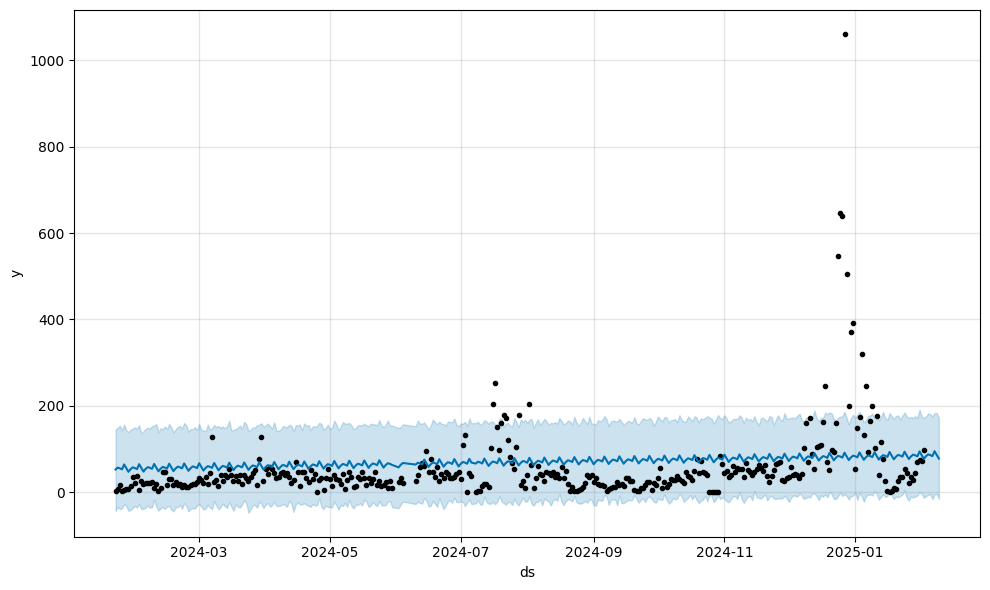

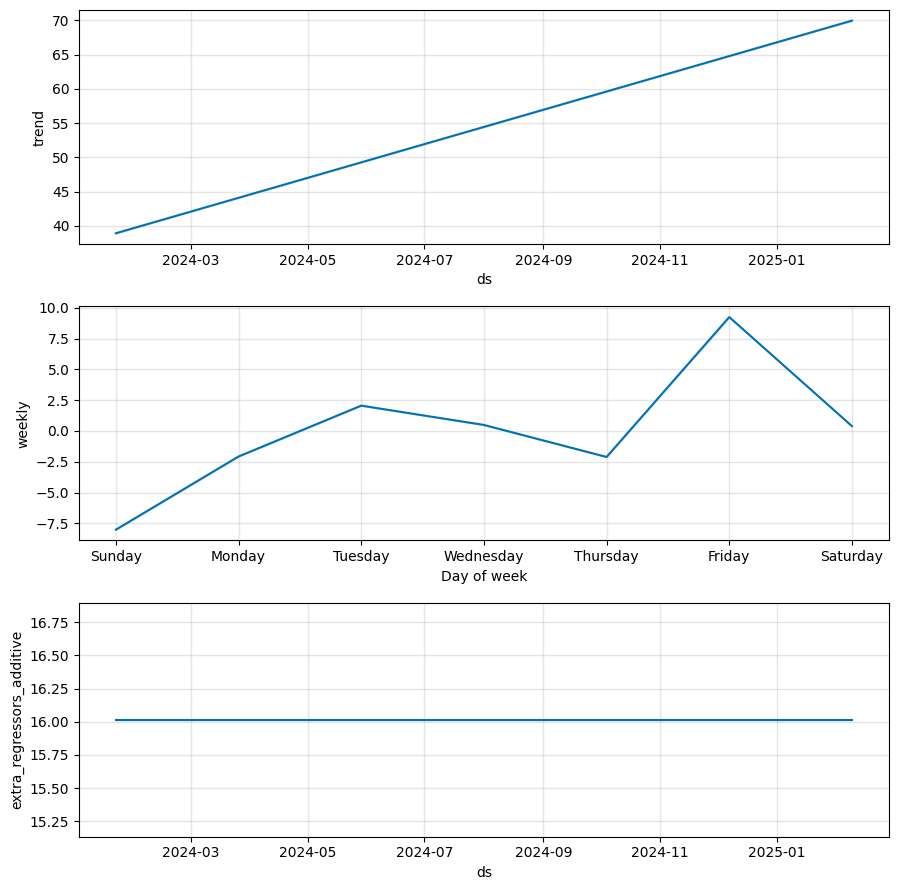

In [44]:
# Plot predictions
fig1 = model.plot(forecast)
plt.show()

# Plot components
fig2 = model.plot_components(forecast)
plt.show()

In [45]:
# Split the data into training and testing
train = df_prophet
test = df_prophet.tail(7)  # Use the last 7 days for testing

# Actual values for the last 7 days (from test set)
actual_values = test['y']

# Predicted values from the forecast (7 days ahead)
predicted_values = forecast['yhat'].tail(7)

# Calculate MAE (Mean Absolute Error)
mae = mean_absolute_error(actual_values, predicted_values)
print(f"MAE: {mae}")

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(actual_values, predicted_values))
print(f"RMSE: {rmse}")

# Calculate MAPE (Mean Absolute Percentage Error)
mape = mean_absolute_percentage_error(actual_values, predicted_values)
print(f"MAPE: {mape}")


MAE: 31.041422256484616
RMSE: 35.28668105663775
MAPE: 0.7421926733416424


In [46]:
best_params

{'changepoint_prior_scale': 0.01,
 'growth': 'linear',
 'holidays_prior_scale': 1,
 'seasonality_mode': 'additive',
 'seasonality_prior_scale': 10}